## Car insurance modelling

In [34]:
# import des librairies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

In [35]:
# import dataset 'car insurrance'
car_insurance = pd.read_csv("/Users/ranu/Documents/Data-Science-project/Insurance/insurance_dataset.csv")

In [36]:
# study this data
print("Les types des variables sont les suivantes : ")
print(car_insurance.dtypes)
print("\n")

print("Les statistiques pour les variables quantitatives sont les suivantes :")
print(car_insurance[["age_of_driver", "car_age", "number_of_claims"]].describe())
print("\n")

print("Au niveau des régions, voici ce qu'on a :")
print(car_insurance[["region"]].describe())

Les types des variables sont les suivantes : 
age_of_driver        int64
car_age              int64
region              object
number_of_claims     int64
dtype: object


Les statistiques pour les variables quantitatives sont les suivantes :
       age_of_driver      car_age  number_of_claims
count    5000.000000  5000.000000       5000.000000
mean       53.299000     9.575800          0.511400
std        20.646851     5.789107          0.723032
min        18.000000     0.000000          0.000000
25%        36.000000     5.000000          0.000000
50%        53.000000    10.000000          0.000000
75%        71.000000    15.000000          1.000000
max        89.000000    19.000000          5.000000


Au niveau des régions, voici ce qu'on a :
       region
count    5000
unique      3
top     Urban
freq     2276


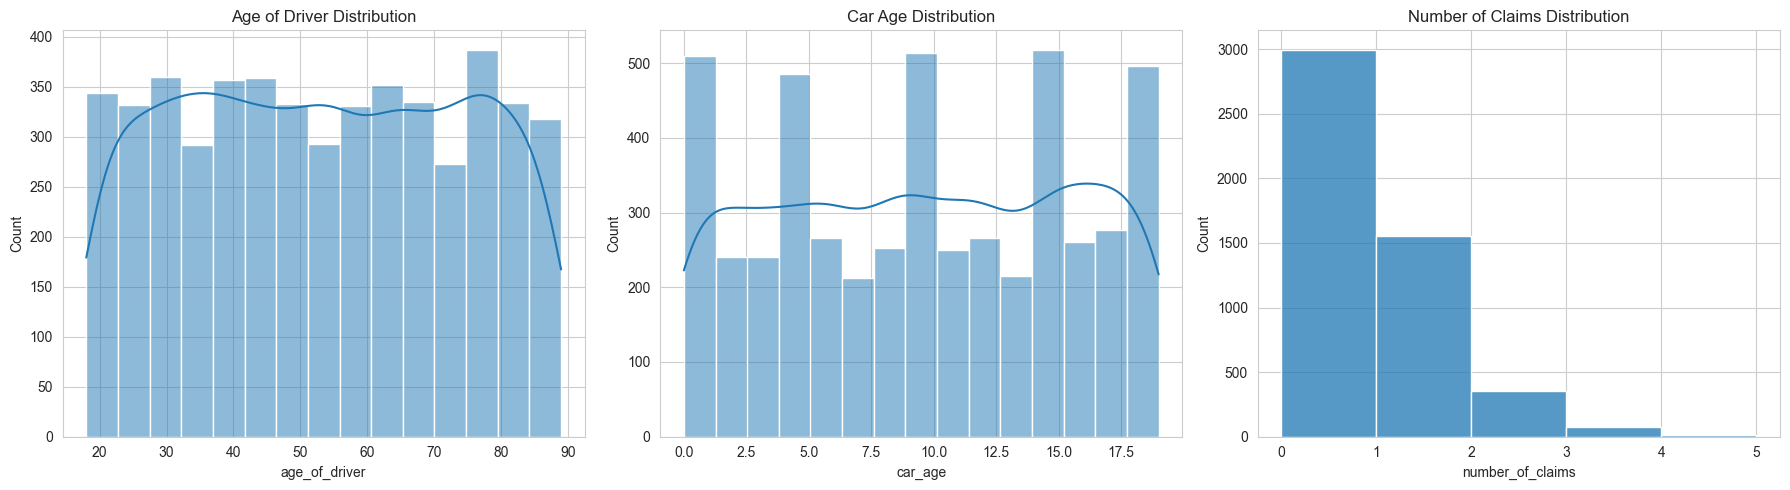

In [37]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting distributions of numerical variables
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(car_insurance['age_of_driver'], kde=True, bins=15, ax=ax[0])
ax[0].set_title('Age of Driver Distribution')

sns.histplot(car_insurance['car_age'], kde=True, bins=15, ax=ax[1])
ax[1].set_title('Car Age Distribution')

sns.histplot(car_insurance['number_of_claims'], kde=False, bins=range(6), ax=ax[2])
ax[2].set_title('Number of Claims Distribution')

plt.tight_layout()
plt.show()

In [38]:
# Number of claims grouping by region
car_insurance.groupby("region")["number_of_claims"].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Rural,1246.0,0.537721,0.730147,0.0,0.0,0.0,1.0,4.0
Suburban,1478.0,0.486468,0.718848,0.0,0.0,0.0,1.0,4.0
Urban,2276.0,0.513181,0.721599,0.0,0.0,0.0,1.0,5.0


In [39]:
# Preprocessing

## One-Hot Encoding : the target is to obtain 3 news boolean features instead of the feature "region"
car_insurance_encoded = pd.get_dummies(car_insurance, ["region"])

## Split dataframe into two sample
X = car_insurance_encoded.drop("number_of_claims", axis=1)
y = car_insurance_encoded["number_of_claims"]

In [40]:
# Modelling : Poisson regression

## Add constant to features
X_const = sm.add_constant(X)

## Poisson regression
poisson_glm = sm.GLM(y, X_const.astype(float), family= sm.families.Poisson()).fit()

## Summary
poisson_glm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       number_of_claims   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4995
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4699.8
Date:                Sun, 07 Dec 2025   Deviance:                       5081.0
Time:                        21:41:58   Pearson chi2:                 5.11e+03
No. Iterations:                     5   Pseudo R-squ. (CS):           0.002149
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5681      0.048    -11.794      0.000      -0.662      -0.474
age_of_driver       0.0023      0.001      2.443      0.015       0.000       0.004
car_age            -0.0040      0.003     -1.160      0.246      -0.011       0.003
region_Rural       -0.1403      0.035     -4.043      0.000      -0.208      -0.072
region_Suburban    -0.2390      0.034     -7.025      0.000      -0.306      -0.172
region_Urban       -0.1887      0.030     -6.275      0.000      -0.248      -0.130
===================================================================================
"""

By analyzing this set of data, we observe :
- **age_of_driver** : the coefficient is 0,23, then, the age of driver allows to increase the number of claims. Additionnaly one year, the lof of expected claims increases. The p-value is significant because it is lower than 0,05.
- **car_age** : the coefficient is -0,004. It explains with an additional year of car's age, the number of claim decreases. But, the p-value is 0,246, so it is not significant. 
- **region** : For all type of region, the coefficient is negative and the p-value is really significant at 1% treshold. It shows an important link between region and the number of claims.

In [41]:
# Modelling : Negative Binomial
negative_binomial = sm.NegativeBinomial(y, X_const.astype(float)).fit(disp=False)

## Summary
negative_binomial.summary()

/Users/ranu/Documents/Data-Science-project/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:       number_of_claims   No. Observations:                 5000
Model:               NegativeBinomial   Df Residuals:                     4994
Method:                           MLE   Df Model:                            5
Date:                Sun, 07 Dec 2025   Pseudo R-squ.:                0.001122
Time:                        21:41:58   Log-Likelihood:                -4699.3
converged:                       True   LL-Null:                       -4704.6
Covariance Type:            nonrobust   LLR p-value:                   0.06097
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.7365        nan        nan        nan         nan         nan
age_of_driver       0.0023        nan        nan        nan         nan         nan
car_age            -0.0040        nan        nan        nan         nan         nan
region_Rural        0.0281        nan        nan        nan         nan         nan
region_Suburban    -0.0707        nan        nan        nan         nan         nan
region_Urban       -0.0203        nan        nan        nan         nan         nan
alpha               0.0363        nan        nan        nan         nan         nan
===================================================================================
"""

This type of regression has completely failed.